# 4.6 全连接网络后向传播可视化
<font color=black size=3 face=雅黑>
    
建立一个三层的全连接网络（多层感知器）来进行同心圆数据分类并可视化其后向传播过程,

下列参数的修改请参见 [**MLP_net.py**](MLP_net.py) 中的注释。</font>
    

- 激活函数：ReLU
- 最后一层：Sigmoid
- 损失函数：Cross Entropy Loss
- 训练样本：make_circles


本例代码参考于下述博客。

- Author：Michael Nielsen
- Projiect：http://neuralnetworksanddeeplearning.com/index.html

关于整体的可视化过程及其间的一些探讨性质问题可以参考文件：

- Repository：https://github.com/shz1236/Remote-sensing-pattern-recognition


## 4.6.1 导入相关库

In [1]:
import os
import numpy as np
import MLP_net
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.font_manager import FontProperties
#引入字体并设置中文标题的格式
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12)

## 4.6.2 整理数据为可训练格式


   <font color=black size=3 face=雅黑>    
- 转换数据格式
- 构建样本整体坐标系
- 数据数值归一化
- 自定义colorbar
- 绘制训练样本的分布图
</font>

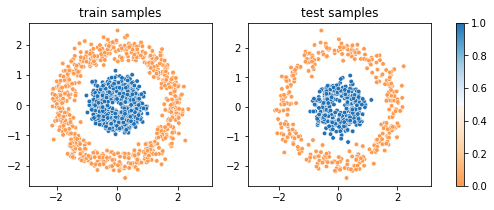

In [2]:
X,y= datasets.make_circles(n_samples = 2000, factor=0.3, noise=.1)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# 转换数据格式
training_data = []
test_data = []
#构建特征空间
c,r = np.mgrid[[slice(X.min()- .2,X.max() + .2,50j)]*2]
p = np.c_[c.flat,r.flat]

# 归一化
ss = StandardScaler().fit(X)
X = ss.transform(X)
p = ss.transform(p)
X_test = ss.transform(X_test)
for k in range(len(y)):
    training_data.append([np.array([[X[k, 0]], [X[k, 1]]]), np.array([y[k]])])
for k in range(0, len(y_test), 10):
    test_data.append([np.array([[X_test[k, 0]], [X_test[k, 1]]]), np.array([y_test[k]])])

#可视化
fig = plt.figure(figsize = (9,3))
#自定义cmap
top = cm.get_cmap('Oranges_r', 512)
bottom = cm.get_cmap('Blues', 512)
newcolors = np.vstack((top(np.linspace(0.55, 1, 512)),
                       bottom(np.linspace(0, 0.75, 512))))
cm_bright = ListedColormap(newcolors, name='OrangeBlue')
#数据样本的分布图
plt.subplot(121)
m1 = plt.scatter(*X.T,c = y,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
plt.title('train samples')
plt.axis('equal')
plt.subplot(122)
m2 = plt.scatter(*X_test.T,c = y_test,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
plt.title('test samples')
plt.axis('equal')
ax = fig.get_axes()
plt.colorbar(ax = ax)
# plt.show()

## 4.6.3 设置网络结构及其超参数

In [3]:
#设置网络结果
network_size = [2,3,2,1]
#训练次数
epoch = 5
#batch大小（单次训练样本个数）
batchsize = 1340
#学习率大小
learn_rate = 0.1

## 4.6.4 初始化网络，并进行训练

In [4]:
#初始化网络
net = MLP_net.Network(network_size)
#训练数据，并保存训练过程中间量
evaluation_cost, evaluation_accuracy, training_cost, training_accuracy ,training_loss, layers_bincode, Pl_z ,Pl_w ,  Pl_b  ,Pa_z,Pz_w= net.SGD(p,training_data, epoch, batchsize,
                                                                                     learn_rate,test_data)


Epoch 0 training complete
Cost on training data: 0.6946307281399482
Accuracy on training data: 666 / 1340
Cost on evaluation data: 0.6930871368477345
Accuracy on evaluation data: 34 / 66
Epoch 1 training complete
Cost on training data: 0.6945464048730764
Accuracy on training data: 666 / 1340
Cost on evaluation data: 0.6930574602924686
Accuracy on evaluation data: 34 / 66
Epoch 2 training complete
Cost on training data: 0.6944663040748089
Accuracy on training data: 666 / 1340
Cost on evaluation data: 0.6930295052656404
Accuracy on evaluation data: 34 / 66
Epoch 3 training complete
Cost on training data: 0.6943915228896658
Accuracy on training data: 666 / 1340
Cost on evaluation data: 0.6930031412762429
Accuracy on evaluation data: 34 / 66
Epoch 4 training complete
Cost on training data: 0.6943219498024017
Accuracy on training data: 666 / 1340
Cost on evaluation data: 0.6929793854674967
Accuracy on evaluation data: 34 / 66


## 4.6.5 可视化后向传播过程
<font color=black size=3 face=雅黑>

将整个后向传播过程，每个节点上的各个求导量，各层节点之前权重和偏置的更新值在特征空间分布情况可视化出来，包括以下变量</font>
- Pl_z,每个节点上的误差delta
- Pl_w,节点之间的权重更新量
- Pl_b,节点之间的梯度更新量
- Pa_z,激活值（输出值）对输入值的偏导数
- Pz_w,上一层的激活值（输出值）



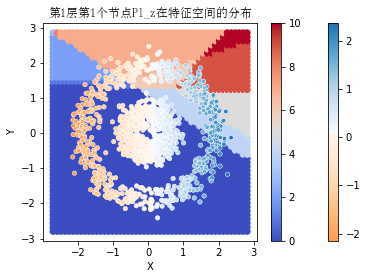

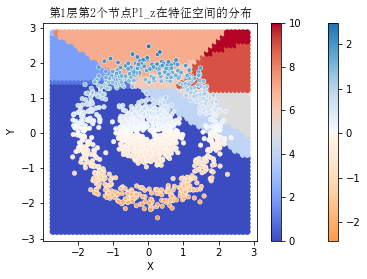

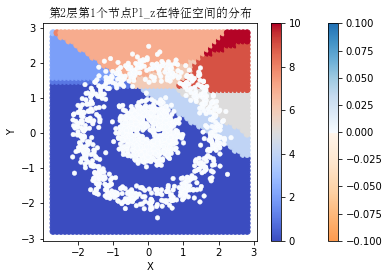

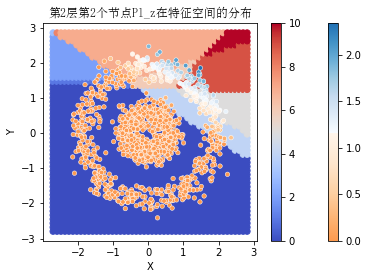

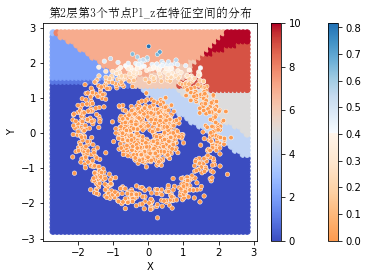

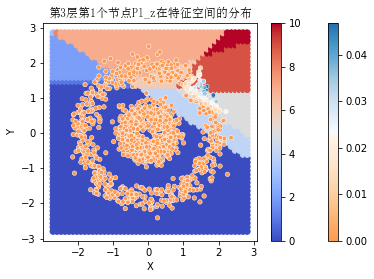

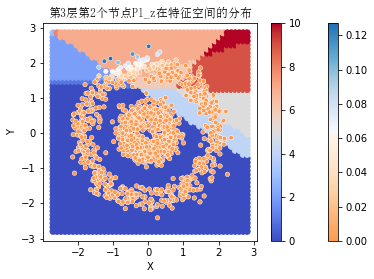

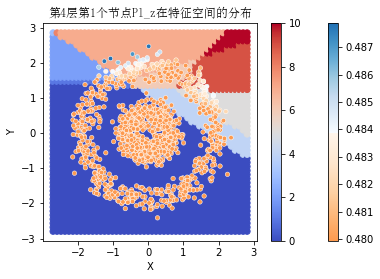

In [5]:
#绘制最终胞腔分割底图
epoch=0
layersBinCode=None
for i in range(np.array(layers_bincode).shape[-1]):    
    layer_bincode=np.squeeze(np.array([x[i] for x in layers_bincode[epoch]]),axis=-1)
    layersBinCode = layer_bincode if layersBinCode is None else np.hstack((layersBinCode, layer_bincode))
layers_numcode=MLP_net.mapping(layersBinCode)
#将需要可视化的求导中间量赋值给value进行后向过程可视化
value=Pz_w
for layer_num in range(np.array(value[epoch]).shape[-1]):
    y=np.squeeze(np.array([x[layer_num] for x in value[epoch]]),axis=-1)
    for i in range(y.shape[1]):
        ax = MLP_net.scatter(p, layers_numcode, X, y[:,i], cm_bright, )
        ax.set_title('第%d层第%d个节点Pl_z在特征空间的分布' % (layer_num + 1, i + 1), fontproperties=font_set)
plt.show()